In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
fs = ['/home/abrar/cross_section_rl/data/cross_section_data/sphere_10verts_10sections.npz']
fs.append('/home/abrar/cross_section_rl/data/cross_section_data/12_sided_pyramid_short_10verts_10sections.npz')
fs.append('/home/abrar/cross_section_rl/data/cross_section_data/Twisted_Vase_Basic_10verts_10sections.npz')

In [3]:
f_idx = 0
data = np.load(fs[f_idx], allow_pickle=True)
M = data['cross_sections']
sample_spacing = data['step']



In [4]:
import utils
import pyrender
import trimesh

def draw(pts, tri_face, renderer, cam_pose=[
                          [ 0,  0,  1,  1.4],
                          [ 1,  0,  0,  .5],
                          [ 0,  1,  0,  1],
                          [ 0,  0,  0,  1]
                          ]):
    mesh = trimesh.Trimesh(pts, tri_face)
    mesh = pyrender.Mesh.from_trimesh(mesh, smooth=False, wireframe=False)

    scene = pyrender.Scene()
    camera = pyrender.PerspectiveCamera( yfov=np.pi / 3.0)
    light = pyrender.PointLight(color=[1,1,1], intensity=2e3)

    scene.add(mesh, pose=  np.eye(4))
    light_pose = [            [ 0,  0,  1,  2],
                          [ 1,  0,  0,  .5],
                          [ 0,  1,  0,  .5],
                          [ 0,  0,  0,  1]
                          ]
    scene.add(light, pose=  light_pose)

    scene.add(camera, pose=cam_pose)

    img, _ = renderer.render(scene)
    return img


/home/abrar/anaconda3/envs/cross/lib/python3.7/site-packages/ipykernel_launcher.py:47: DeprecationWarning: scipy.rand is deprecated and will be removed in SciPy 2.0.0, use numpy.random.rand instead


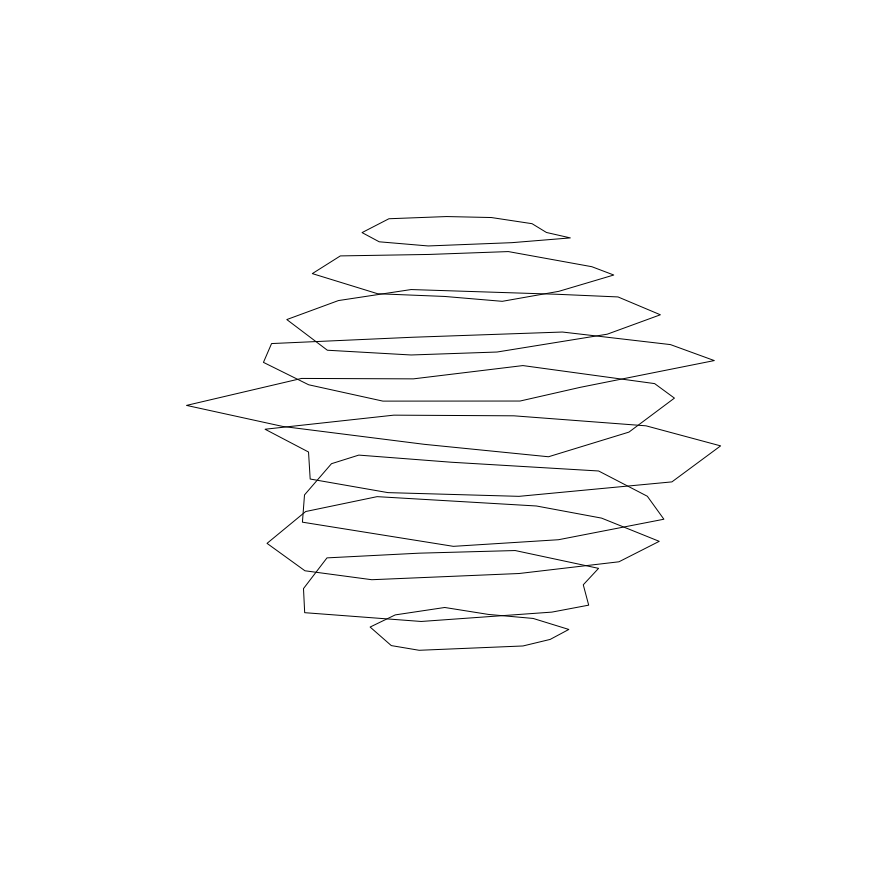

In [5]:
import mpl_toolkits.mplot3d as a3
import matplotlib.colors as colors
import pylab as pl
import scipy as sp
plt.rcParams['axes.grid'] = False


f_idx = 0
data = np.load(fs[f_idx], allow_pickle=True)
M = data['cross_sections']
sample_spacing = data['step']

noise_scale = .15
for x in M:
    n = np.random.normal(loc=0, scale=x[:,0].std(), size=x[:,0].shape) * noise_scale
    x[:,0] += n
    n = np.random.normal(loc=0, scale=x[:,1].std(), size=x[:,1].shape) * noise_scale
    x[:,1] += n
def get_points(M_list):
    pts = np.empty(shape = (0,3))
    for i, m in enumerate(M_list):
        col_to_add = np.ones(len(m))*i*sample_spacing
        res = np.hstack([m, np.atleast_2d(col_to_add).T])
        pts = np.concatenate([pts, res])
    return pts

def draw_contours(pts):
    fig = plt.figure(figsize=(16,16))
    ax = fig.add_subplot(1, 1, 1, projection='3d')

    ax.view_init(elev=10., azim=0)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.set_zticklabels([])
    ax.grid(False)
    ax.axis('off') 
    # ax.set_xlim(-1, 1)
    # ax.set_ylim(0, 1)
    ax.set_zlim(np.min(pts[:,2]), np.max(pts[:,2]))
    ax.set_ylim(np.min(pts[:,1]), np.max(pts[:,1]))
    ax.set_xlim(np.min(pts[:,0]), np.max(pts[:,0]))

    for i in range(10):
        vtx = pts[0 + i*10:10 + i*10]

        tri = a3.art3d.Poly3DCollection([vtx])
        tri.set_color(colors.rgb2hex(sp.rand(3)))
        tri.set_edgecolor('k')
        tri.set_facecolor((.18, .31, .31, 0))
        ax.add_collection3d(tri)
    pl.show()

pts = get_points(M)
draw_contours(pts)





# load a mesh
# mesh = trimesh.Trimesh(pts, tri_face)

# mesh.export('test.stl')
# print()

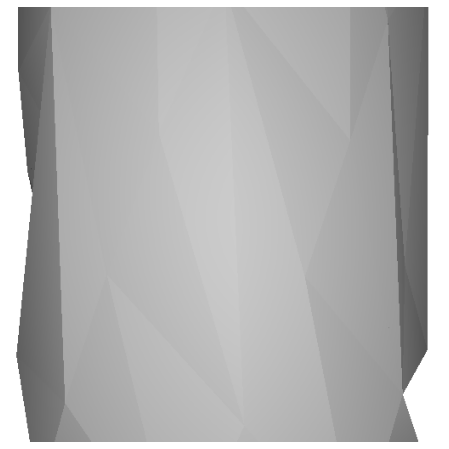

In [6]:
import utils
import pyrender
import trimesh
import matplotlib.pyplot as plt
import numpy as np

f_idx = 2
data = np.load(fs[f_idx], allow_pickle=True)
M = data['cross_sections']
sample_spacing = data['step']


renderer = pyrender.OffscreenRenderer(512, 512)
pts, tri_face, tetra_face, reward = utils.triangulate_list_and_reward(M, sample_spacing, weights=None, reward_type='scaled_jacobian')


mesh = trimesh.Trimesh(vertices=pts, faces=tri_face)
cam_pose = [[ 0,  0,  1,  1.5],
            [ 1,  0,  0,  .5],
            [ 0,  1,  0,  .5],
            [ 0,  0,  0,  1]
            ]
img = draw(pts, tri_face, renderer, cam_pose=cam_pose)

f, ax = plt.subplots()
f.set_figheight(8)
f.set_figwidth(8)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.grid(False)
ax.axis('off')
ax.imshow(img)

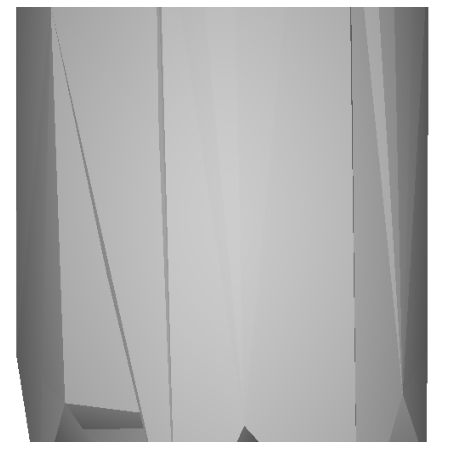

In [7]:
f_idx = 2
data = np.load(fs[f_idx], allow_pickle=True)
M = data['cross_sections']
sample_spacing = data['step']


renderer = pyrender.OffscreenRenderer(512, 512)
pts, tri_face, tetra_face, reward = utils.triangulate_list_and_reward(M, sample_spacing, weights=np.zeros(np.array(M).shape), reward_type='scaled_jacobian')


mesh = trimesh.Trimesh(vertices=pts, faces=tri_face)
cam_pose = [[ 0,  0,  1,  1.5],
            [ 1,  0,  0,  .5],
            [ 0,  1,  0,  .5],
            [ 0,  0,  0,  1]
            ]
img = draw(pts, tri_face, renderer, cam_pose=cam_pose)

f, ax = plt.subplots()
f.set_figheight(8)
f.set_figwidth(8)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.grid(False)
ax.axis('off')
ax.imshow(img)

b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00a\x03\x00\x00l;\x8f\xbe\x91xm\xbf-r}\xbe]\x93!?\xa5\xcc\x1f\xbc\x00\x00\x00\x00Z/\xb2=\x1a\xb8\xc8=)<X>\x86&\xb0>\xa0Z\x9d=\x00\x00\x00\x00\x00\x00\xa1\x0e[?\xbc\xd8\xda\xbe\x1cZ\x95\xbe\xa5\x08a?o\xa9\xd8>\x00\x00\x00\x00\xcb\xbd\x81?\x1cg\x0c?)<X>\xa0\xb5]?*\x91\x81>)<X>\x00\x00\\Av\xbf6\xed\x1e>=Tf\xbeIqa?\xee5=?)<X>\xc4\xb8m?u\xf8:?\x00\x00\x00\x00\xa5\x08a?o\xa9\xd8>\x00\x00\x00\x00\x00\x00\xba\xd0\\?\xb0b\xb0\xbd\xaaD\xff\xbe\xa5\x08a?o\xa9\xd8>\x00\x00\x00\x00\xcb\xbd\x81?\x1cg\x0c?)<X>:\x12[?\xf0uB>\x00\x00\x00\x00\x00\x00\x0e\xac\xdf\xbd\xb4\x86m\xbf[\x99\xb6>]\x93!?\xa5\xcc\x1f\xbc\x00\x00\x00\x00B\xf20?D\xc8\x83=)<X>\xbd\x0c\xb1>\xe1\x0b\xd7=)<X>\x00\x00\x00\

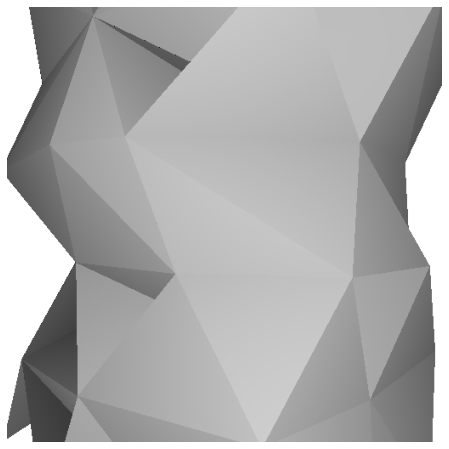

In [12]:

f_idx = 2
data = np.load(fs[f_idx], allow_pickle=True)
M = data['cross_sections']
sample_spacing = data['step']

noise_scale = .15
for x in M:
    n = np.random.normal(loc=0, scale=x[:,0].std(), size=x[:,0].shape) * noise_scale
    x[:,0] += n
    n = np.random.normal(loc=0, scale=x[:,1].std(), size=x[:,1].shape) * noise_scale
    x[:,1] += n

renderer = pyrender.OffscreenRenderer(512, 512)
pts, tri_face, tetra_face, reward = utils.triangulate_list_and_reward(M, sample_spacing, weights=np.zeros(np.array(M).shape), reward_type='scaled_jacobian')

tri_face = fill_local_faces(M, sample_spacing, .3)
tri_face = np.concatenate( tri_face, axis=0 )

mesh = trimesh.Trimesh(vertices=pts, faces=tri_face)
cam_pose = [[ 0,  0,  1,  1.5],
            [ 1,  0,  0,  .5],
            [ 0,  1,  0,  .5],
            [ 0,  0,  0,  1]
            ]
img = draw(pts, tri_face, renderer, cam_pose=cam_pose)

f, ax = plt.subplots()
f.set_figheight(8)
f.set_figwidth(8)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.grid(False)
ax.axis('off')
ax.imshow(img)
mesh.export('test.stl')

In [9]:
def fill_local_faces(M, sample_spacing, spacing_multiplier):
    local_faces = []
    for i in range(1, len(M)):
        to_reconstruct = np.array([M[i-1], M[i]])
        _, tri_face, _, _ = utils.triangulate_list_and_reward(to_reconstruct, \
          sample_spacing*spacing_multiplier, weights=None, reward_type="scaled_jacobian")
        # store the faces that we get. These faces are only between two cross-sections, so they are going to be between 0 and 200

        shifted_faces = tri_face + (i-1)*10 # this 100 is the number of points!!!
        local_faces.append(shifted_faces)
    return local_faces



In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_evals(path):
    file1 = open(path, 'r')
    Lines = file1.readlines()

    # Strips the newline character
    evals = []
    for line in Lines:
        if line.find('Eval') != -1:
            evals.append(eval(line[line.index('{'):]))
#             evals.append(eval(line[line.index('{'):]))
    return evals

In [3]:
HOT_path = "/home/abrar/cross_section_rl/saved/WHERE I GOT IMAGE 523 FROM/Twisted_Vase_Basic_10verts_10sections_qualities.txt"
evals = get_evals(HOT_path)
print(evals[0].keys())

dict_keys(['scaled_jacobian', 'max_angle', 'shape', 'shape_and_size', 'shear', 'skew', 'stretch', 'volume', 'radius_ratio', 'aspect_ratio', 'area', 'distortion', 'HOT'])


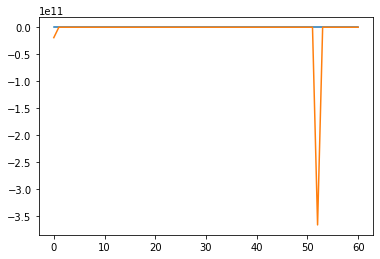

In [4]:
x = np.arange(len(evals))
y = []
for d in evals:
    y.append(d['scaled_jacobian'])
plt.plot(x,y)

x = np.arange(len(evals))
y = []
for d in evals:
    y.append(d['HOT'])
plt.plot(x,y)

dict_keys(['scaled_jacobian', 'max_angle', 'shape', 'shape_and_size', 'shear', 'skew', 'stretch', 'volume', 'radius_ratio', 'aspect_ratio', 'area', 'distortion', 'scaled_jacobian_degen_tri', 'HOT'])


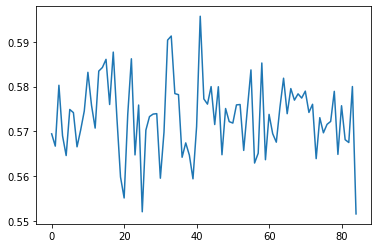

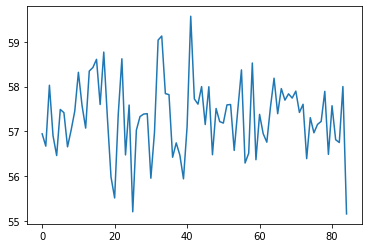

In [5]:
sj_path = "/home/abrar/cross_section_rl/saved/weights_local_1621207160.1466196_scaled_jacobian/Twisted_Vase_Basic_10verts_10sections_qualities.txt"
evals = get_evals(sj_path)
print(evals[0].keys())

x = np.arange(len(evals))
y = []
for d in evals:
    y.append(d['scaled_jacobian'])
plt.plot(x,y)
plt.figure()


x = np.arange(len(evals))
y = []
for d in evals:
    y.append(d['HOT'])
plt.plot(x,y)

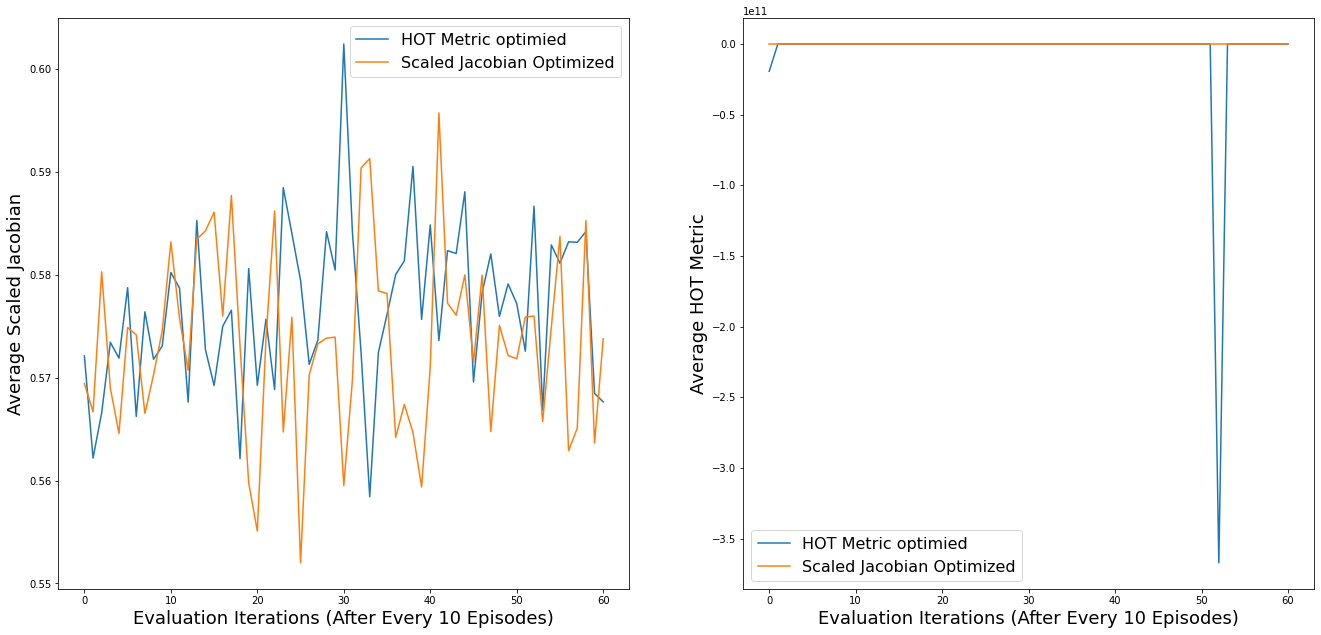

In [23]:
import matplotlib.pyplot as plt



HOT_path = "/home/abrar/cross_section_rl/saved/WHERE I GOT IMAGE 523 FROM/Twisted_Vase_Basic_10verts_10sections_qualities.txt"
HOT_evals = get_evals(HOT_path)

sj_path = "/home/abrar/cross_section_rl/saved/weights_local_1621207160.1466196_scaled_jacobian/Twisted_Vase_Basic_10verts_10sections_qualities.txt"
sj_evals = get_evals(sj_path)

max_len = min(len(HOT_evals), len(sj_evals))

x = np.arange(max_len)
hot_y = []
sj_y = []

hot_y_hot = []
sj_y_hot = []

for i in range(max_len):
    hot_y.append(HOT_evals[i]['scaled_jacobian'])
    sj_y.append(sj_evals[i]['scaled_jacobian'])
    hot_y_hot.append(HOT_evals[i]['HOT'])
    sj_y_hot.append(sj_evals[i]['HOT'])

    
    
fig = plt.gcf()
fig.set_size_inches(22.5, 10.5)
plt.subplot(1,2,1)
plt.xlabel("Evaluation Iterations (After Every 10 Episodes)", fontsize=18)
plt.ylabel("Average Scaled Jacobian", fontsize=18)
plt.plot(x,hot_y, label="HOT Metric Optimied")
plt.plot(x,sj_y, label="Scaled Jacobian Optimized")
plt.legend(fontsize=16)

plt.subplot(1,2,2)
plt.xlabel("Evaluation Iterations (After Every 10 Episodes)", fontsize=18)
plt.ylabel("Average HOT Metric", fontsize=18)
plt.plot(x,hot_y_hot, label="HOT Metric Optimied")
plt.plot(x,sj_y_hot, label="Scaled Jacobian Optimized")

plt.legend(fontsize=16)
fig.savefig('twisting_metrics.pdf')